In [1]:
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
import seaborn as sns
colors = sns.hls_palette(8, l=.3, s=.8)

In [2]:
def QCDAxion(ax,
                          C_logwidth=10,KSVZ_on=True,DFSZ_on=True,
                          cmap='YlGn',fs=20,RescaleByMass=False,text_on=True,thick_lines=False):
            if RescaleByMass:
                rs1 = 1.0
                rs2 = 0.0
            else:
                rs1 = 0.0
                rs2 = 1.0
            ## QCD Axion band:
            g_min,g_max = ax.get_ylim()
            m_min,m_max = ax.get_xlim()

            # Mass-coupling relation
            def g_x(C_ag,m_a):
                return 2e-10*C_ag*m_a
            KSVZ = 1.92
            DFSZ = 0.75

            if rs1==0:
                # Plot Band
                n = 200
                mlim=0.192
                g = logspace(log10(g_min),log10(g_max),n)
                m = logspace(log10(m_min),log10(m_max),n)
                QCD = zeros(shape=(n,n))
                for i in range(0,n):
                    QCD[:,i] = norm.pdf(log10(g)-log10(g_x(1.0,m[i])),0.0,0.8)
                cols = cm.get_cmap(cmap)

                cols.set_under('w') # Set lowest color to white
                vmin = amax(QCD)/(C_logwidth/4.6)
                plt.contourf(m, g, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)
                plt.contourf(m, g, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)
                plt.contourf(m, g, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)

                # QCD Axion models
                rot = 45.0
                trans_angle = plt.gca().transData.transform_angles(array((rot,)),array([[0, 0]]))[0]
                m2 = array([1e-9,5e-8])
                if KSVZ_on:
                    if thick_lines:
                        plt.plot(m,g_x(KSVZ,m),'-',linewidth=5,color='k',zorder=0)
                        plt.plot(m,g_x(KSVZ,m),'-',linewidth=3,color=cols(0.7),zorder=0)
                    else:
                        plt.plot(m,g_x(KSVZ,m),'-',linewidth=2,color=cols(1.0),zorder=0)
                    if text_on:
                        plt.text(1e-3,g_x(KSVZ,1e-3)*1.05,r'KSVZ',fontsize=fs,rotation=trans_angle,color=cols(1.0),ha='left',va='bottom',rotation_mode='anchor',weight="bold")
                if DFSZ_on:
                    if thick_lines:
                        plt.plot(m,g_x(DFSZ,m),'-',linewidth=5,color='k',zorder=0)
                        plt.plot(m,g_x(DFSZ,m),'-',linewidth=3,color=cols(0.7),zorder=0)
                    else:
                        plt.plot(m,g_x(DFSZ,m),'-',linewidth=2,color=cols(1.0),zorder=0)
                    if text_on:
                        plt.text(5e-4,g_x(DFSZ,5e-4)/1.5,r'DFSZ II',fontsize=fs,rotation=trans_angle,color=cols(1.0),ha='left',va='top',rotation_mode='anchor',weight="bold")
            else:
                C_min,C_max = ax.get_ylim()
                n = 200
                C = logspace(log10(C_min),log10(C_max),n)
                m = logspace(log10(m_min),log10(m_max),n)
                QCD = zeros(shape=(n,n))
                for i in range(0,n):
                    QCD[:,i] = norm.pdf(log10(C),0.0,0.8)
                cols = cm.get_cmap(cmap)
                cols.set_under('w') # Set lowest color to white
                vmin = amax(QCD)/(C_logwidth/2)
                plt.contourf(m, C, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)
                plt.contourf(m, C, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)
                plt.contourf(m, C, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)
                if thick_lines:
                    plt.plot([1e-9,1e0],[0.75,0.75],'-',lw=5,color='k')
                    plt.plot([1e-9,1e0],[0.75,0.75],'-',lw=3,color='k')
                else:
                    plt.plot([1e-9,1e0],[0.75,0.75],'-',lw=2,color='k')
                if text_on:
                    plt.text(1e-2,0.75/3,r'DFSZ II',fontsize=fs,color='k')
                
            
            #plt.fill_between(mcmb,g_x(KSVZ,mcmb),g_x(DFSZ,mcmb), facecolor="none", hatch="//", edgecolor="k", linewidth=2.5)
            #plt.fill_between(mcmb,g_x(KSVZ,mcmb),g_x(DFSZ,mcmb), color="grey", alpha=0.3)

            #plt.plot([0.2,0.2],[0,g_x(KSVZ,0.2)], color="k",linestyle="-." ,linewidth=2.5) 
            
            return


In [3]:
 def Helioscopes(ax,col=[0.5, 0.0, 0.13],fs=20,projection=True,RescaleByMass=False):
        
        # CAST arXiv:[1705.02290]
        y2 = ax.get_ylim()[1]
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        #dat = loadtxt("limit_data/AxionPhoton/CAST_highm.txt")
        #plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'-',color=col,lw=2,zorder=1.49,alpha=1)
        #plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor='k',alpha=0.3,facecolor=col,zorder=1.49,lw=0.1)
        #plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2, facecolor="none", hatch="/", edgecolor="grey", linewidth=0)
        dat = loadtxt("limit_data/AxionPhoton/CAST.txt")
        plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'-',color=col,lw=2,zorder=1.5,alpha=1)
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor='k',alpha=0.3,facecolor=col,zorder=1.5,lw=0.1)
        #plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2, facecolor="none", hatch="/", edgecolor="grey", linewidth=0)
        if rs1==0:
            plt.text(1e-3,8e-11,r'CAST',fontsize=fs,color=col,rotation=0,weight="bold")
        else:
            plt.text(4e-2,5e3,r'CAST',fontsize=fs,color='w',rotation=0,ha='center',va='top')

        if projection:
            # IAXO arXiv[1212.4633]
            IAXO_col = 'purple'
            IAXO = loadtxt("limit_data/AxionPhoton/Projections/IAXO.txt")
            plt.plot(IAXO[:,0],IAXO[:,1]/(rs1*2e-10*IAXO[:,0]+rs2),'--',linewidth=2,color=IAXO_col,zorder=0.5)
            plt.fill_between(IAXO[:,0],IAXO[:,1]/(rs1*2e-10*IAXO[:,0]+rs2),y2=y2,edgecolor=None,facecolor=IAXO_col,zorder=0,alpha=0.3)
            if rs1==0:
                plt.text(2e-3,0.5e-11,r'IAXO',fontsize=fs,color=IAXO_col,rotation=0,weight="bold")
            else:
                plt.text(0.7e-2,0.12e1,r'IAXO',fontsize=fs,color=IAXO_col,rotation=0)
        return

In [4]:
def NeutronStars(ax,col=[0.1, 0.5, 0.2],fs=17,RescaleByMass=False):
        # Neutron stars: Green Bank arXiv:[2004.00011]
        # Jansky VLA: 2008.01877, 2008.11188

        y2 = ax.get_ylim()[1]
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        dat = loadtxt('limit_data/AxionPhoton/NeutronStars_GreenBank.txt')
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.2)
        plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'k-',alpha=0.1,lw=0.5,zorder=0)

        dat = loadtxt('limit_data/AxionPhoton/NeutronStars_VLA.txt')
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.2)
        plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'k-',alpha=0.1,lw=0.5,zorder=0)

        if rs1==0:
            plt.text(1e-5,5e-12,r'Neutron stars',fontsize=fs,color=col,alpha=0.7,rotation=90)
        else:
            plt.text(1e-7,4e3,r'{\bf Neutron}',fontsize=fs,color=col,ha='center')
            plt.text(1e-7,1e3,r'{\bf stars}',fontsize=fs,color=col,ha='center')
            plt.plot([3.5e-7,7e-6],[6e3,2e4],lw=1.5,color=col)

In [5]:
    def ORGAN(ax,col='grey',projection=False,fs=15,RescaleByMass=False):
        # ORGAN arXiv[1706.00209]
        y2 = ax.get_ylim()[1]
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        #col = [0.8, 0.0, 0.0]
        dat = loadtxt("limit_data/AxionPhoton/ORGAN.txt")
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=col,facecolor=col,zorder=0.1,lw=2)

        if projection:
            dat = loadtxt("limit_data/AxionPhoton/Projections/ORGAN_Projected.txt")
            plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'-',linewidth=1.5,color=col,zorder=0)
            plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0,alpha=0.15)
            if rs1==0:
                plt.text(6.4e-5,2e-13,r'ORGAN',fontsize=fs,color=col,rotation=40,weight="bold")
            else:
                plt.text(1.2e-4,1e3,r'{\bf ORGAN}',fontsize=18,color='darkred',rotation=-90,ha='left',va='top')

        else:
            if rs1==0:
                plt.text(110e-6,1e-11,r'{\bf ORGAN}',fontsize=fs,color=col,rotation=-90,ha='left',va='top')
        return

In [6]:
def MADMAX(ax,col='darkred',fs=20,RescaleByMass=False):
        # MADMAX arXiv[2003.10894]
        y2 = ax.get_ylim()[1]
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        dat = loadtxt("limit_data/AxionPhoton/Projections/MADMAX.txt")
        plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'--',linewidth=1.5,color=col,zorder=0)
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0,alpha=0.15)
        if rs1==0:
            plt.text(5e-5,3.5e-14,r'MADMAX',fontsize=fs,color=col,rotation=36,weight="bold")
        else:
            plt.text(7e-5,3.5e0,r'{\bf MADMAX}',fontsize=14,color=col,rotation=0,ha='left',va='top')
        return

In [7]:
 def PlasmaHaloscope(ax,col='darkred',fs=18,RescaleByMass=False):
        # Plasma Haloscope arXiv[1904.11872]
        y2 = ax.get_ylim()[1]
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        dat = loadtxt("limit_data/AxionPhoton/Projections/PlasmaHaloscope.txt")
        plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'-',linewidth=2,color=col,zorder=0)
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0,alpha=0.2)
        if rs1==0:
            #plt.text(3.6e-5,2.5e-14,r'Plasma Haloscope',fontsize=fs,color=col,rotation=38,weight="bold")
            plt.text(2.7e-5,7e-14,r'Plasma Haloscope',fontsize=fs,color=col,rotation=90,weight="bold")
        #else:
            #plt.text(2.3e-4,5e-1,r'{\bf Plasma}',fontsize=fs,color=col,rotation=0,ha='center',va='top')
           # plt.text(2.3e-4,2e-1,r'{\bf haloscope}',fontsize=fs,color=col,rotation=0,ha='center',va='top')
        return

In [8]:
    def BRASS(ax,col=[0.5, 0.1, 0.2],fs=15,RescaleByMass=False):
        # BRASS http://www.iexp.uni-hamburg.de/groups/astroparticle/brass/brassweb.htm
        y2 = ax.get_ylim()[1]
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        dat = loadtxt("limit_data/AxionPhoton/Projections/BRASS.txt")
        plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'-',linewidth=1.5,color=col,zorder=0)
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,facecolor=col,zorder=0,alpha=0.1)
        if rs1==0:
            plt.text(1.5e-3,1.1e-11,r'BRASS',rotation=50,fontsize=fs,color=col, weight="bold")
        else:
            plt.text(1e-3,0.12e3,r'{\bf BRASS}',rotation=15,fontsize=fs,color=col,ha='left',va='top')

In [9]:
     def ADMX(ax,col="orange",projection=False,fs=30,RescaleByMass=False):
        if RescaleByMass:
            rs1 = 1.0
            rs2 = 0.0
        else:
            rs1 = 0.0
            rs2 = 1.0
        # 2018: arXiv[1804.05750]
        # 2019: arXiv[1910.08638]
        y2 = ax.get_ylim()[1]
        #col = [0.8, 0.0, 0.0]
        dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.5)
        dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.5)
        dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.5)
        dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.5)
        dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar.txt")
        plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0.1,alpha=0.5)


        if projection:
            # ADMX arXiv[1804.05750]
            dat = loadtxt("limit_data/AxionPhoton/Projections/ADMX_Projected.txt")
            plt.plot(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),'-',linewidth=1.5,color=col,zorder=0,alpha=0.5)
            plt.fill_between(dat[:,0],dat[:,1]/(rs1*2e-10*dat[:,0]+rs2),y2=y2,edgecolor=None,facecolor=col,zorder=0,alpha=0.1)
            if rs1==0:
                plt.text(1.3e-6,1e-13,r'ADMX',fontsize=fs,color=col,rotation=90, weight="bold")
            else:
                plt.text(0.9e-6,0.15,r'{\bf ADMX}',fontsize=fs,color=col,rotation=0,ha='left',va='top')
        else:
            if rs1==0:
                plt.text(0.7e-6,1e-13,r'{\bf ADMX}',fontsize=fs,color=col,rotation=90,ha='left',va='top')

        return


In [10]:
def Telescopes(ax,projection=True,fs=15):
        y2 = ax.get_ylim()[1]

        #Telescopes (MUSE) [2009.01310]
        Telescopes = loadtxt("limit_data/AxionPhoton/Telescopes_MUSE.txt")
        plt.fill_between(Telescopes[:,0],Telescopes[:,1],y2=y2,edgecolor=None,facecolor='olive',alpha=0.35)
        plt.text(2,2e-13,r'Telescopes (MUSE+VIMOS)',fontsize=fs,color='olive',rotation=90,alpha=1)

        # Telescopes (VIMOS) [astro-ph/0611502]
        Telescopes = loadtxt("limit_data/AxionPhoton/Telescopes_VIMOS.txt")
        plt.fill_between(Telescopes[:,0],Telescopes[:,1],y2=y2,edgecolor=None,facecolor='olive',alpha=0.35)        
        #plt.text(7,1e-11,r'VIMOS',fontsize=fs,color='grey',rotation=-90,ha='left',va='top')

        return

In [22]:
def Cosmology(ax,mlim=0.192,mlim2=0.574,mlim3=0.980, planck_BAO=False, fs=20):
    
            ## QCD Axion band:
            g_min,g_max = ax.get_ylim()
            m_min,m_max = ax.get_xlim()
            
            #g_c_min=
            #g_c_max=1e-7
            m_c_min=mlim
            m_c_max=10
            cmap='RdGy'
            C_logwidth=10

            # Mass-coupling relation
            def g_x(C_ag,m_a):
                return 2e-10*C_ag*m_a
            KSVZ = 1.92
            DFSZ = 0.75
            
            n = 200
            g = logspace(log10(g_min),log10(g_max),n)
            m = logspace(log10(m_c_min),log10(m_c_max),n)
            m_c=logspace(log10(mlim),log10(m_c_max),n)
            mcmb = logspace(log10(mlim),log10(m_max),n)
            

            #mcmb = logspace(log10(0.2),log10(m_max),n)
            QCD = zeros(shape=(n,n))
            for i in range(0,n):
                QCD[:,i] = norm.pdf(log10(g)-log10(g_x(1.0,m_c[i])),0.0,0.8)
            cols = cm.get_cmap(cmap)

            cols.set_under('w') # Set lowest color to white
            vmin = amax(QCD)/(C_logwidth/4.6)
            plt.contourf(m_c, g, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,alpha=0.7)
            #plt.contourf(m_c, g, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)
            #plt.contourf(m_c, g, QCD, 50,cmap=cols,vmin=vmin,vmax=0.9,zorder=0)

            
            #plt.fill_between(mcmb,g_x(KSVZ,mcmb),g_x(DFSZ,mcmb), facecolor="none", hatch="//", edgecolor="k", linewidth=2.5)
            #plt.fill_between(mcmb,g_x(KSVZ,mcmb),g_x(DFSZ,mcmb), color="r", alpha=0.2)

            plt.plot([mlim,mlim],[0,1e-7], color="k",linestyle="-." ,linewidth=2.5)
            
            plt.text(mlim-0.28*mlim,1.5e-14,r'CMB+BBN,95% CL', fontsize=18,color="k", rotation=90)
            #plt.text(mlim+0.07*mlim,g_x(DFSZ,mlim)+0.5*g_x(DFSZ,mlim),r'$\Lambda\rm{CDM} + m_a + \sum m_{\nu}$', fontsize=fs,color="k", rotation=36.5,weight="bold")
            plt.text(mlim+0.07*mlim,g_x(DFSZ,mlim)+0.5*g_x(DFSZ,mlim),r'Thermal Axion Cosmology', fontsize=20,color="k", rotation=36.5,weight="bold")
            plt.fill_between(mcmb,g_x(KSVZ,mcmb),g_x(DFSZ,mcmb), facecolor="none", edgecolor="k", linewidth=2)
            #plt.fill_between(mcmb,g_x(KSVZ,mcmb),g_x(DFSZ,mcmb), facecolor="none", hatch="||", edgecolor="dimgray", linewidth=0)
           

                
            if planck_BAO:
                
                mcmb3 = logspace(log10(mlim2),log10(m_max),n)
                #plt.fill_between(mcmb3,g_x(KSVZ,mcmb3),g_x(DFSZ,mcmb3), color="r", alpha=0.13,linewidth=0)
                plt.plot([mlim2,mlim2],[0,g_x(DFSZ,mlim2)], color="k",linestyle="-." ,linewidth=2.5)
                plt.plot([mlim2,mlim2],[g_x(KSVZ,mlim2),1e-7], color="k",linestyle="-." ,linewidth=2.5)
                plt.text(mlim2-0.21*mlim2,1.5e-14,r'Planck 2018 + BBN (95% CL)', fontsize=15,color="k", rotation=90)
                
                #mcmb3 = logspace(log10(mlim2),log10(m_max),n)
                #plt.fill_between(mcmb3,g_x(KSVZ,mcmb3),g_x(DFSZ,mcmb3), color="r", alpha=0.13,linewidth=0)
                #plt.plot([mlim3,mlim3],[0,g_x(DFSZ,mlim3)], color="k",linestyle="-." ,linewidth=2.5)
                #plt.plot([mlim3,mlim3],[g_x(KSVZ,mlim3),1e-7], color="k",linestyle="-." ,linewidth=2.5)
                #plt.text(mlim3-0.28*mlim3,1.5e-14,r'Axion-Pion (Planck, 95% CL)', fontsize=18,color="k", rotation=90)
            
            return


/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_5061/3255791415.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cols = cm.get_cmap(cmap)
/var/folders/2y/t1c42csx6bx5vb64r23x1ct00000gp/T/ipykernel_5061/3980513969.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cols = cm.get_cmap(cmap)


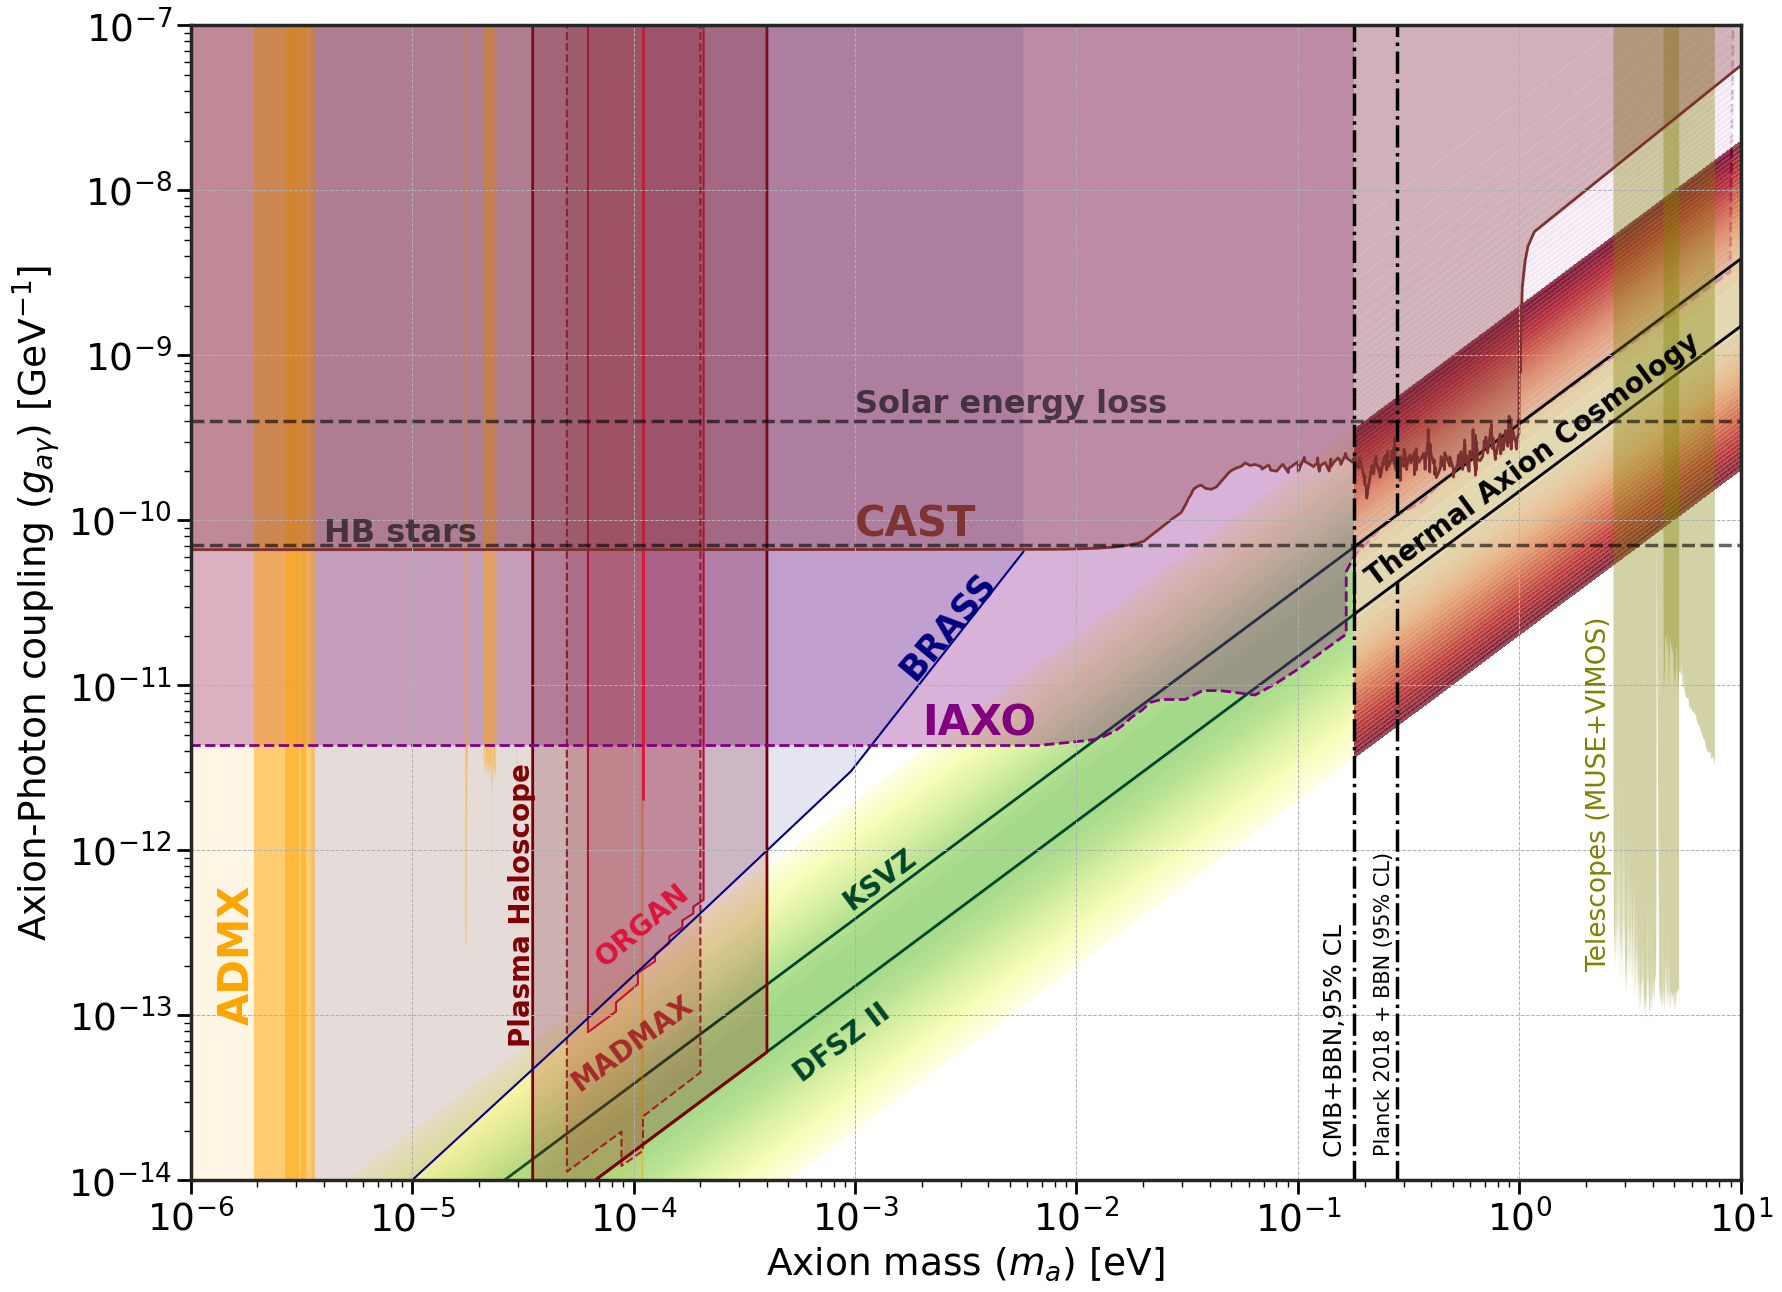

In [23]:
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = "2.5"
plt.rcParams["ytick.labelsize"]  = "27"
plt.rcParams["xtick.labelsize"]  = "27"
plt.rcParams["axes.titlesize"]  = "27"
#plt.rcParams["figure.figsize"] = [15, 10.4]
plt.rcParams["figure.figsize"] = [20, 15]
#plt.rcParams["figure.figsize"] = [18, 13]
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

#plt.xticks(rotation=0)
#plt.yticks(rotation=0)

ax1 = plt.subplot(111)


ax1.set_xlabel(r'Axion mass ($m_a$) [eV]',fontsize = 27)
ax1.set_ylabel(r'Axion-Photon coupling ($g_{a\gamma}$) [$\rm{GeV}^{-1}$]',fontsize = 27)
ax1.grid(linestyle='--',linewidth=0.7)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-6,10)
ax1.set_ylim(1e-14,1e-7)

QCDAxion(ax1,text_on=True)
Helioscopes(ax1,col=[0.5, 0.2, 0.2],fs=30,projection=True)
#NeutronStars(ax1,fs=20)
ADMX(ax1,col="orange",projection=True,fs=30)
ORGAN(ax1,col='crimson',projection=True,fs=20)
MADMAX(ax1,col="brown",fs=20)
PlasmaHaloscope(ax1,col="maroon",fs=20)
BRASS(ax1,col="navy",fs=25)

Cosmology(ax1,mlim=0.18,mlim2=0.28,planck_BAO=True,fs=19)

Telescopes(ax1,projection=True,fs=19)
ax1.hlines(y=7.0783e-11, xmin=1e-6, xmax=10, linewidth=2.5, color='k',ls="--",alpha=0.6)
ax1.text(4e-6,7.5e-11,'HB stars',fontsize=23,color='k',weight='bold',alpha=0.6)

ax1.hlines(y=4.01e-10, xmin=1e-6, xmax=10, linewidth=2.5, color='k',ls="--",alpha=0.6)
ax1.text(1e-3,4.53e-10,'Solar energy loss',fontsize=23,color='k',weight='bold',alpha=0.6)

plt.savefig("Figure3.pdf")